# Extract Rectangles From Image

## Links

- [Extract bounding box and save it as an image](https://stackoverflow.com/questions/13887863/extract-bounding-box-and-save-it-as-an-image)
- [Drawing Bounding box around given size Area contour](https://stackoverflow.com/questions/23398926/drawing-bounding-box-around-given-size-area-contour)
- [extract_rect.py](https://gist.github.com/siphomateke/78cc10a5c0a978f9399098e92754c1ce)
- [Image Thresholding](https://docs.opencv.org/4.x/d7/dd0/tutorial_js_thresholding.html)
- [Contours](https://docs.opencv.org/4.x/d4/d73/tutorial_py_contours_begin.html)

In [1]:

import cv2
# Only used to display the image, don't add to the final script
import matplotlib.pyplot as plt

# ROI count
ROI_COUNT = 0

# New image count
NEW_COUNT = 1

# Read image
image = cv2.imread("local_images/001.png")

# Copy original image
image_copy = image.copy()

# Convert image to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

## Treshhold

- [Image Thresholding](https://docs.opencv.org/4.x/d7/dd0/tutorial_js_thresholding.html)

If pixel value is greater than a threshold value, it is assigned one value (may be white), else it is assigned another value (may be black).

We use the function: `cv.threshold (src, dst, thresh, maxval, type)`

Parameters:

- `src`	input array.
- `dst`	output array of the same size and type and the same number of channels as src.
`thresh` threshold value.
- `maxval` maximum value to use with the `cv.THRESH_BINARY` and `cv.THRESH_BINARY_INV` thresholding types.
- `type` thresholding type(see cv.ThresholdTypes).

1. The first argument is the source image, which should be a grayscale image.
2. The second argument is the threshold value which is used to classify the pixel values.
3. The third argument is the maximum value which is assigned to pixel values exceeding the threshold.
4. OpenCV provides different types of thresholding which is given by the fourth parameter of the function.

    - cv.THRESH_BINARY
    - cv.THRESH_BINARY_INV
    - cv.THRESH_TRUNC
    - cv.THRESH_TOZERO
    - cv.THRESH_TOZERO_INV

> `The THRESH_OTSU`, use Otsu algorithm to choose the optimal threshold value

In [2]:
thresh = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

## Contours

- [Contours](https://docs.opencv.org/4.x/d4/d73/tutorial_py_contours_begin.html)

Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. The contours are a useful tool for shape analysis and object detection and recognition.

- For better accuracy, use binary images. So before finding contours, apply threshold or canny edge detection.


```Python
  import numpy as np
  import cv2 as cv
  im = cv.imread('test.jpg')
  imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
  ret, thresh = cv.threshold(imgray, 127, 255, 0)
  contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
```

See, there are three arguments in [cv.findContours()](https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0) function

1. first one is source image
2. second is contour retrieval mode
3. third is contour approximation method. 

And it outputs the **contours** and **hierarchy**. Contours is a Python list of all the contours in the image. Each individual contour is a Numpy `array` of `(x,y)` **coordinates of boundary points of the object**.

### Contour Approximation Method

This is the third argument in [cv.findContours](https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0) function. What does it denote actually?

Above, we told that contours are the boundaries of a shape with same intensity. It stores the (x,y) coordinates of the boundary of a shape. But does it store all the coordinates ? That is specified by this contour approximation method.

If you pass [cv.CHAIN_APPROX_NONE](https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#gga4303f45752694956374734a03c54d5ffaf7d9a3582d021d5dadcb0e37201a62f8), all the boundary points are stored. But actually do we need all the points? For eg, you found the contour of a straight line. Do you need all the points on the line to represent that line? No, we need just two end points of that line. This is what [cv.CHAIN_APPROX_SIMPLE](https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#gga4303f45752694956374734a03c54d5ffa5f2883048e654999209f88ba04c302f5) does. It removes all redundant points and compresses the contour, thereby saving memory.

Below image of a rectangle demonstrate this technique. Just draw a circle on all the coordinates in the contour array (drawn in blue color). First image shows points I got with [cv.CHAIN_APPROX_NONE](https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#gga4303f45752694956374734a03c54d5ffaf7d9a3582d021d5dadcb0e37201a62f8) (734 points) and second image shows the one with [cv.CHAIN_APPROX_SIMPLE](https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#gga4303f45752694956374734a03c54d5ffa5f2883048e654999209f88ba04c302f5) (only 4 points). See, how much memory it saves!!!

![](https://docs.opencv.org/4.x/none.jpg)

In [3]:
contours, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

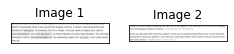

In [4]:
for c in contours:
    rect = cv2.boundingRect(c)
    if rect[2] < 100 or rect[3] < 100:
        continue
    x, y, w, h = rect
    ROI = image[y + 2 : y + h - 2, x + 2 : x + w - 2]

    if (ROI_COUNT % 2) == 0:
        # Save new images
        # cv2.imwrite("extracted/extract_rectangles_{}.png".format(ROI_COUNT), ROI)

        # Display new images
        # cv2.imshow("Extracted {}".format(NEW_COUNT), ROI)

        # Display images on notebook
        plt.subplot(2, 3, NEW_COUNT), plt.imshow(ROI)
        plt.title("Image {}".format(NEW_COUNT))
        plt.xticks([]), plt.yticks([])

        NEW_COUNT += 1
    
    ROI_COUNT += 1

# cv2.waitKey(0)
# cv2.destroyAllWindows()
